In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [29]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() 

In [30]:
len(X_train)

60000

In [31]:
len(X_test)

10000

In [32]:
X_train[0].shape

(28, 28)

In [33]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

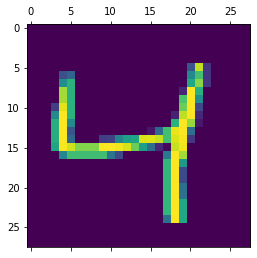

In [34]:
plt.matshow(X_train[2])

In [35]:
y_train[2]

4

In [36]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
X_train.shape


(60000, 28, 28)

In [52]:
X_train = X_train/255
X_test = X_test/255


In [53]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


X_train_flattened.shape
# X_test_flattened.shape


(60000, 784)

In [54]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 715us/step - loss: 0.4692 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 1s 703us/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 704us/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 724us/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 745us/step - loss: 0.2665 - accuracy: 0.9260


In [56]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 648us/step - loss: 0.2702 - accuracy: 0.9261


[0.27019697427749634, 0.9261000156402588]

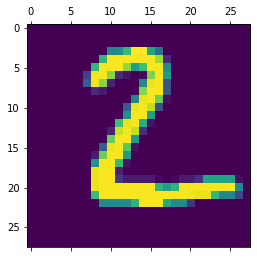

In [66]:
plt.matshow(X_test[1])

In [67]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 560us/step


array([5.4626805e-01, 4.3648165e-03, 9.9944413e-01, 3.3513802e-01,
       4.1628487e-10, 8.2209837e-01, 9.1293067e-01, 7.5889588e-13,
       2.1079324e-01, 2.1182143e-09], dtype=float32)

In [68]:
np.argmax(y_predicted[1])

2

In [71]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [72]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [74]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [  10,    9,  922,   12,    6,    4,   13,   10,   41,    5],
       [   5,    0,   20,  903,    0,   33,    2,   13,   25,    9],
       [   1,    1,    2,    2,  893,    0,   14,    5,   10,   54],
       [  11,    3,    2,   20,    7,  785,   16,    7,   34,    7],
       [  11,    3,    6,    1,    7,   13,  912,    2,    3,    0],
       [   2,    5,   22,    5,    3,    0,    0,  953,    3,   35],
       [   7,    7,    6,   15,    9,   23,    8,   12,  877,   10],
       [  11,    7,    1,    7,   13,    7,    0,   21,    6,  936]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

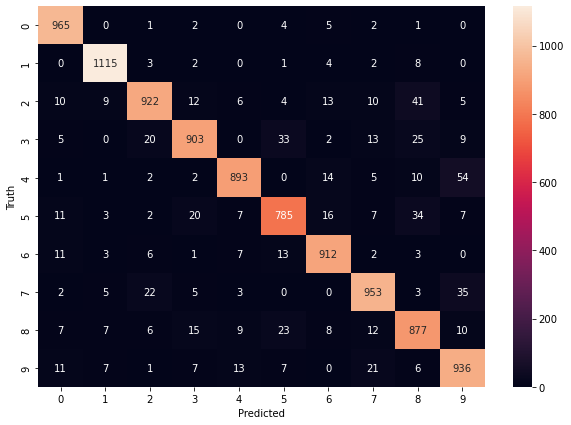

In [75]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1213 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0837 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0621 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0489 - accuracy: 0.9855


In [78]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 772us/step - loss: 0.0760 - accuracy: 0.9760


[0.07599632441997528, 0.9760000109672546]

313/313 [==============================] - 0s 668us/step


Text(69.0, 0.5, 'Truth')

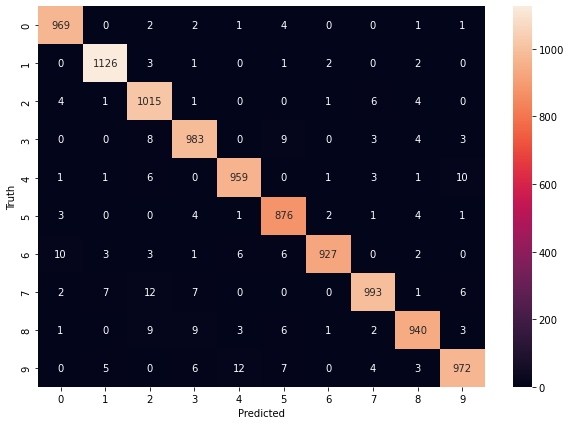

In [80]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2752 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1262 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0523 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0417 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.020